# AirconditionReliability

### 작성자 : 이윤성(12150357)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Visualizing

In [2]:
AR_df = pd.read_excel('AirConditionerReliability.xlsx')
AR_df.head() # 데이터 확인

,Type,Failure
0,1,94
1,1,109
2,1,150
3,1,179
4,1,212


In [3]:
AR_df.info()

# 총 데이터의 개수는 213개, type은 int형
# null값은 존재하지 않는다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 2 columns):
Type       213 non-null int64
Failure    213 non-null int64
dtypes: int64(2)
memory usage: 3.4 KB


In [4]:
AR_df['Type'].value_counts()

# type 2가 가장 많고, type3, type1이 뒤이어 많음을 확인할 수 있다.

2    86
3    69
1    58
Name: Type, dtype: int64

In [5]:
AR_df.describe()

,Type,Failure
count,213.000000,213.000000
mean,2.051643,982.342723
std,0.772254,630.475285
min,1.000000,23.000000
25%,1.000000,464.000000
50%,2.000000,907.000000
75%,3.000000,1482.000000
max,3.000000,2722.000000


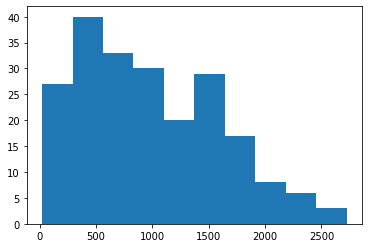

In [6]:
plt.hist(AR_df['Failure']) # 데이터 히스토그램
plt.show()

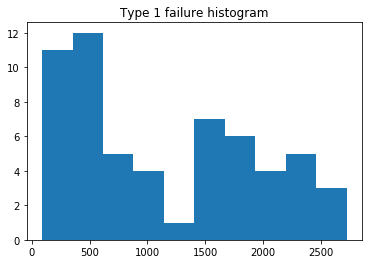

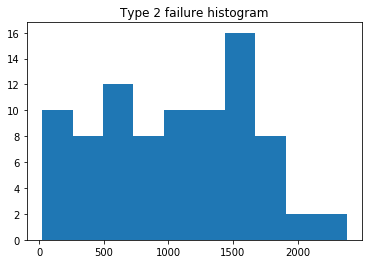

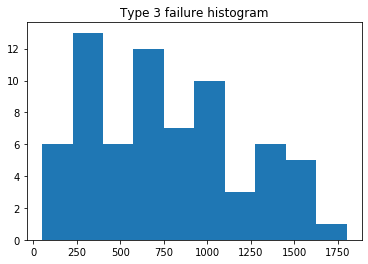

In [7]:
grouped = AR_df.groupby('Type') # 유형별 히스토그램
for type_, group in grouped:
    plt.hist(group['Failure'])
    plt.title('Type {0} failure histogram'.format(type_))
    plt.show()

## 2 Reliability figures with Data

### 타입별 MTTF, B25수명 및 F(t), R(t), f(t), h(t)

In [8]:
# 신뢰성 척도 측정을 위한 데이터 준비
type1_item = AR_df[AR_df['Type']==1]['Failure']
type2_item = AR_df[AR_df['Type']==2]['Failure']
type3_item = AR_df[AR_df['Type']==3]['Failure']

In [9]:
type1_item.describe()

count      58.000000
mean     1149.982759
std       808.414226
min        90.000000
25%       430.500000
50%       974.000000
75%      1847.000000
max      2722.000000
Name: Failure, dtype: float64

In [10]:
type2_item.describe()

count      86.000000
mean     1044.883721
std       584.649506
min        23.000000
25%       544.750000
50%      1073.500000
75%      1503.500000
max      2379.000000
Name: Failure, dtype: float64

In [11]:
type3_item.describe()

count      69.000000
mean      763.478261
std       432.035831
min        50.000000
25%       380.000000
50%       715.000000
75%      1052.000000
max      1800.000000
Name: Failure, dtype: float64

### 2.1 MTTF

In [12]:
# 타입별 평균수명

type1_MTTF = type1_item.describe()['mean']
type2_MTTF = type2_item.describe()['mean']
type3_MTTF = type3_item.describe()['mean']

print('type1_MTTF : ',type1_MTTF)
print('type2_MTTF : ',type2_MTTF)
print('type3_MTTF : ',type3_MTTF)

type1_MTTF :  1149.9827586206898
type2_MTTF :  1044.8837209302326
type3_MTTF :  763.4782608695652


### 2.2 B25 수명

In [13]:
# 타입별 1/4분위선

type1_B25 = type1_item.describe()['25%']
type2_B25 = type2_item.describe()['25%']
type3_B25 = type3_item.describe()['25%']

print('type1_B25 : ', type1_B25)
print('type2_B25 : ', type2_B25)
print('type3_B25 : ', type3_B25)

type1_B25 :  430.5
type2_B25 :  544.75
type3_B25 :  380.0


In [14]:
# 신뢰성 척도 계산을 위한 누적고장갯수 작성

# 도수분포표의 작성요령을 살펴보면 자료수를 n, 계급의 수를 k라 할 때 적절한 계급의 수를 구하는 기준이 제시되어 있다.
# n이 10 ~ 100 일 때, k는 6 ~ 10
# n이 100 ~ 250 일 때, k는 7 ~ 12
# n이 250보다 클 때, k는 10 ~ 20
# AirConditionerReliability의 경우 자료수가 213개이므로, k를 임의로 11로 설정하고, 계급구간의 폭을 250으로 설정한다.

index = ['({0}:{1}]'.format(t, t+250) for t in range(0,2750,250)]

cdf = pd.DataFrame(index=index, columns=['Type 1', 'Type 2', 'Type 3'])

In [15]:
for i,t in zip(cdf.index, range(0,2750,250)):
    cdf.loc[i, 'Type 1'] = sum(type1_item<t+250)
    cdf.loc[i, 'Type 2'] = sum(type2_item<t+250)
    cdf.loc[i, 'Type 3'] = sum(type3_item<t+250)

In [16]:
cdf

,Type 1,Type 2,Type 3
(0:250],8,10,6
(250:500],18,19,22
(500:750],25,30,37
(750:1000],30,39,50
(1000:1250],32,48,55
(1250:1500],35,64,65
(1500:1750],42,78,68
(1750:2000],46,82,69
(2000:2250],50,85,69
(2250:2500],56,86,69


### 2.3 누적확률분포 (불신뢰도 F(t) 함수)

In [17]:
t = range(0,3000,250)

type1_Ft = [0]+[x/len(type1_item) for x in cdf['Type 1']]
type2_Ft = [0]+[x/len(type2_item) for x in cdf['Type 2']]
type3_Ft = [0]+[x/len(type3_item) for x in cdf['Type 3']]

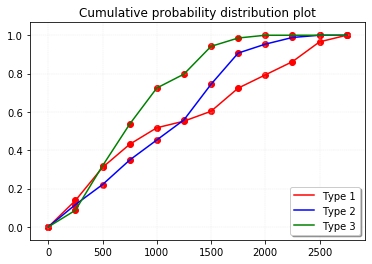

In [18]:
plt.plot(t,type1_Ft, color = 'r',label = 'Type 1')
plt.plot(t,type2_Ft, color = 'b',label = 'Type 2')
plt.plot(t,type3_Ft, color = 'g',label = 'Type 3')

plt.scatter(t,type1_Ft, color = 'r')
plt.scatter(t,type2_Ft, color = 'r')
plt.scatter(t,type3_Ft, color = 'r')

plt.title('Cumulative probability distribution plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='lower right')
plt.show()

### 2.4 누적확률분포 (신뢰도 R(t) 함수)

In [19]:
t = range(0,3000,250)
type1_Rt = [1]+[1-x/len(type1_item) for x in cdf['Type 1']]
type2_Rt = [1]+[1-x/len(type2_item) for x in cdf['Type 2']]
type3_Rt = [1]+[1-x/len(type3_item) for x in cdf['Type 3']]

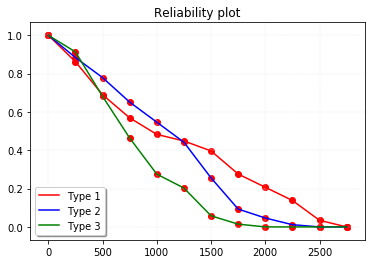

In [20]:
plt.plot(t,type1_Rt, color = 'r',label = 'Type 1')
plt.plot(t,type2_Rt, color = 'b',label = 'Type 2')
plt.plot(t,type3_Rt, color = 'g',label = 'Type 3')

plt.scatter(t,type1_Rt, color = 'r')
plt.scatter(t,type2_Rt, color = 'r')
plt.scatter(t,type3_Rt, color = 'r')

plt.title('Reliability plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='lower left')
plt.show()

### 2.5 고장밀도함수 (f(t) 함수)

In [21]:
t = [t_+125 for t_ in range(0,2750,250)]

type1_ft=[cdf.iloc[0,0]/(len(type1_item)*250)]

for i in range(len(cdf.index))[1:]:
    type1_ft.append((cdf.iloc[i,0]-cdf.iloc[i-1,0])/len(type1_item)*250)
    
type2_ft=[cdf.iloc[0,1]/(len(type2_item)*250)]

for i in range(len(cdf.index))[1:]:
    type2_ft.append((cdf.iloc[i,1]-cdf.iloc[i-1,1])/len(type2_item)*250)
    
type3_ft=[cdf.iloc[0,2]/(len(type3_item)*250)]
    
for i in range(len(cdf.index))[1:]:
    type3_ft.append((cdf.iloc[i,2]-cdf.iloc[i-1,2])/len(type3_item)*250)

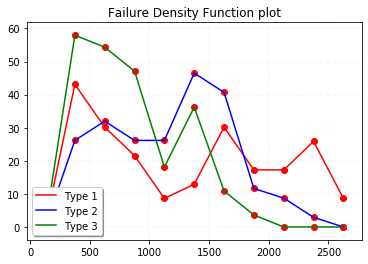

In [22]:
plt.plot(t,type1_ft, color = 'r',label = 'Type 1')
plt.plot(t,type2_ft, color = 'b',label = 'Type 2')
plt.plot(t,type3_ft, color = 'g',label = 'Type 3')

plt.scatter(t,type1_ft, color = 'r')
plt.scatter(t,type2_ft, color = 'r')
plt.scatter(t,type3_ft, color = 'r')

plt.title('Failure Density Function plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='lower left')
plt.show()

### 2.6 순간고장률 (h(t) 함수)

In [23]:
t = [t_+125 for t_ in range(0,2750,250)]

type1_failure = 0
type1_ht=[cdf.iloc[0,0]/(len(type1_item)*250)]
for i in range(len(cdf.index))[1:]:
    type1_ht.append((cdf.iloc[i,0]-cdf.iloc[i-1,0])/((len(type1_item)-type1_failure)*250))
    type1_failure += cdf.iloc[i,0]-cdf.iloc[i-1,0]
    
type2_failure = 0
type2_ht=[cdf.iloc[0,1]/(len(type2_item)*250)]
for i in range(len(cdf.index))[1:]:
    type2_ht.append((cdf.iloc[i,1]-cdf.iloc[i-1,1])/((len(type2_item)-type2_failure)*250))
    type2_failure += cdf.iloc[i,1]-cdf.iloc[i-1,1]
    
type3_failure = 0
type3_ht=[cdf.iloc[0,2]/(len(type3_item)*250)]
for i in range(len(cdf.index))[1:]:
    type3_ht.append((cdf.iloc[i,2]-cdf.iloc[i-1,2])/((len(type3_item)-type3_failure)*250))
    type3_failure += cdf.iloc[i,2]-cdf.iloc[i-1,2]

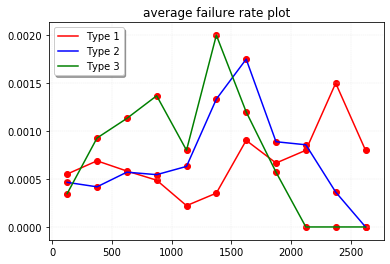

In [24]:
plt.plot(t,type1_ht, color = 'r',label = 'Type 1')
plt.plot(t,type2_ht, color = 'b',label = 'Type 2')
plt.plot(t,type3_ht, color = 'g',label = 'Type 3')

plt.scatter(t,type1_ht, color = 'r')
plt.scatter(t,type2_ht, color = 'r')
plt.scatter(t,type3_ht, color = 'r')

plt.title('average failure rate plot')
plt.grid(True,lw=0.4,ls='--',c='.90')
plt.legend(shadow=True,fancybox=True,loc='upper left')
plt.show()

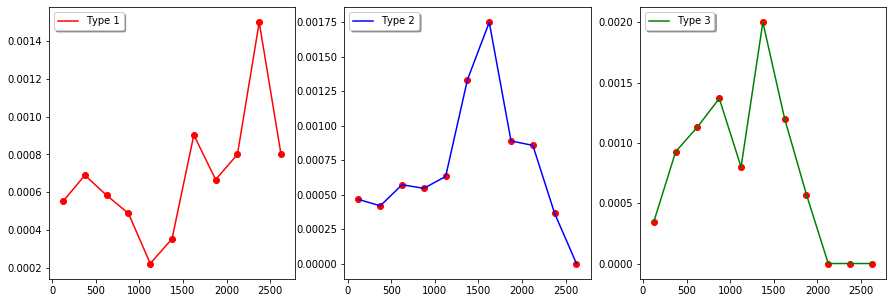

In [25]:
fig = plt.figure()
fig.set_size_inches(15,5) # 크기지정
ax_1 = fig.add_subplot(1,3,1)
ax_2 = fig.add_subplot(1,3,2)
ax_3 = fig.add_subplot(1,3,3)

ax_1.plot(t,type1_ht, color = 'r',label = 'Type 1')
ax_1.scatter(t,type1_ht, color = 'r')
ax_1.legend(shadow=True,fancybox=True,loc='upper left')

ax_2.plot(t,type2_ht, color = 'b',label = 'Type 2')
ax_2.scatter(t,type2_ht, color = 'r')
ax_2.legend(shadow=True,fancybox=True,loc='upper left')

ax_3.plot(t,type3_ht, color = 'g',label = 'Type 3')
ax_3.scatter(t,type3_ht, color = 'r')
ax_3.legend(shadow=True,fancybox=True,loc='upper left')

plt.show()